
# Image Data Augmentation with Keras
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset and helps to solve the problem of overfitting.


In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


### Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40# means that the roation of image varies from -40 to +40
)

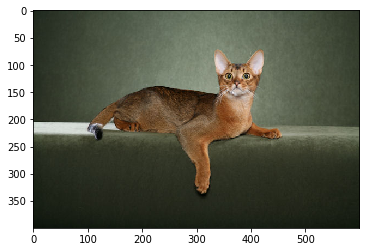

In [4]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


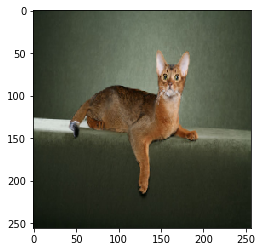

In [8]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Width and Height Shifts
- Shift the picsal to vertical or horizontal axis


In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100,-50,0,50,100],
    height_shift_range=[-50,0,50]
    
)


Found 1 images belonging to 2 classes.


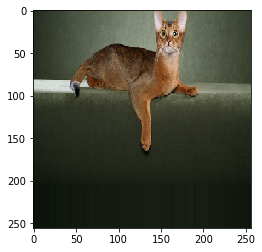

In [12]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Brightness

Found 1 images belonging to 2 classes.


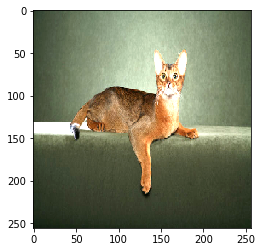

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5,2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Shear Transformation

Found 1 images belonging to 2 classes.


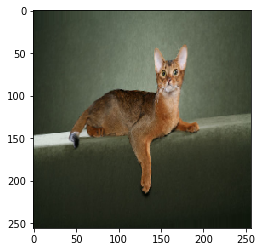

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Zoom

Found 1 images belonging to 2 classes.


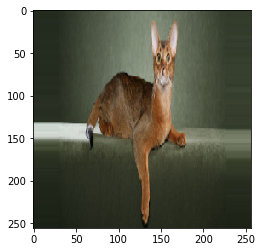

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Channel Shift

Found 1 images belonging to 2 classes.


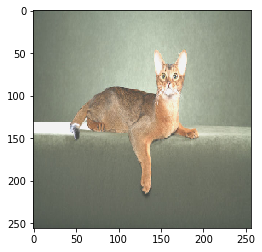

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

##  Flips

Found 1 images belonging to 2 classes.


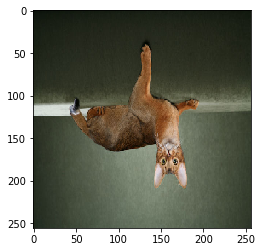

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

##  Normalization

#### Featurewise


In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 61s 0us/step


In [20]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.04964575 0.93414205 [[1]]
120.70756512369792


#### Samplewise


In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

9.934108e-09 1.0 [[8]]


## Rescale and Preprocessing Function

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-0.048537046 0.35148844 [[3]]


## Using in Model Training

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    rotation_range=20,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[1].astype('uint8'));


In [24]:
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,input_shape=(32,32,3),
        pooling='avg'
    
    ),
    tf.keras.layers.Dense(10,activation='softmax')
    
])
model.compile(
loss="sparse_categorical_crossentropy",
optimizer='adam',
metrics=['accuracy'])

C:\Users\J P PANDEY\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 5s 1us/step


In [31]:
_=model.fit(
  generator.flow(x_train,y_train,batch_size=32),
  epochs=3,steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
Epoch 1/3
10/10 [==============================] - 1s 149ms/step - loss: 1.4904 - accuracy: 0.5312
Epoch 2/3
10/10 [==============================] - 1s 149ms/step - loss: 1.5568 - accuracy: 0.4938
Epoch 3/3
10/10 [==============================] - 2s 151ms/step - loss: 1.7711 - accuracy: 0.4344
